In [1]:
import rioxarray
import geopandas as gpd

In [2]:
# surface_HARV = rioxarray.open_rasterio("../data/data/NEON-DS-Airborne-Remote-Sensing/HARV/DSM/HARV_dsmCrop.tif", masked=True)
chm_HARV = rioxarray.open_rasterio("../data/data/NEON-DS-Airborne-Remote-Sensing/HARV/CHM/HARV_chmCrop.tif", masked=True)


In [20]:
chm_HARV

<xarray.DataArray (band: 1, y: 1367, x: 1697)>
[2319799 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.315e+05 7.315e+05 ... 7.331e+05 7.331e+05
  * y            (y) float64 4.714e+06 4.714e+06 ... 4.712e+06 4.712e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  38.169998168945
    STATISTICS_MEAN:     18.097804669578
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   5.3218337145236
    scale_factor:        1.0
    add_offset:          0.0

### Bounding box crop

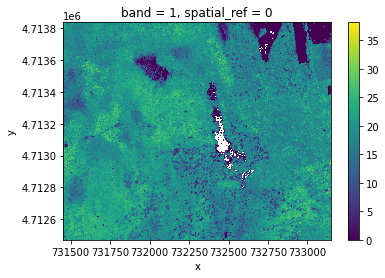

In [3]:
chm_HARV.plot()

In [4]:
bounding_box = dict(minx=731750,
                 maxx=732250,
                 miny=4.7134e6,
                 maxy=4.7138e6,)
             
chm_HARV_crop = chm_HARV.rio.clip_box(**bounding_box)

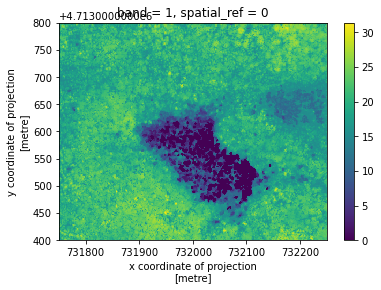

In [5]:
chm_HARV_crop.plot()

### Polygon Crop

In [42]:
# Make a polygon 
import geopandas as gpd
from shapely.geometry import Polygon

xlist= [731800, 732000, 732200, 732100, 731900, 731800]
ylist = [4.71355e6, 4.7137e6, 4.7136e6, 4.7134e6, 4.71345e6, 4.71355e6]

polygon_geom = Polygon(zip(xlist, ylist))
polygon = gpd.GeoDataFrame(index=[0], crs=chm_HARV.rio.crs, geometry=[polygon_geom])       
print(polygon.geometry)

0    POLYGON ((731800.000 4713550.000, 732000.000 4...
Name: geometry, dtype: geometry


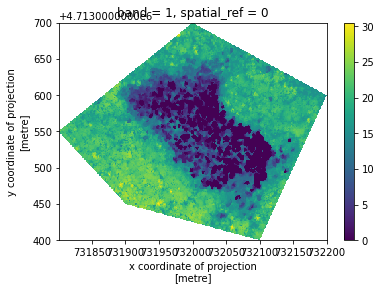

In [43]:
chm_HARV_crop_poly = chm_HARV.rio.clip(polygon['geometry'], polygon.crs)
chm_HARV_crop_poly.plot()

### Crop with buffer from geometry

#### Polyline buffer

In [50]:
# Make a polyline
import geopandas as gpd
from shapely.geometry import LineString

xlist= [731800, 732000, 732100, ]
ylist = [4.7137e6, 4.7136e6, 4.7134e6]

line_geom = LineString(zip(xlist, ylist))
line = gpd.GeoDataFrame(index=[0], crs=chm_HARV.rio.crs, geometry=[line_geom])
polygon_line = line.buffer(50)    
print(polygon_line.geometry)

0    POLYGON ((732022.361 4713644.721, 732026.372 4...
dtype: geometry


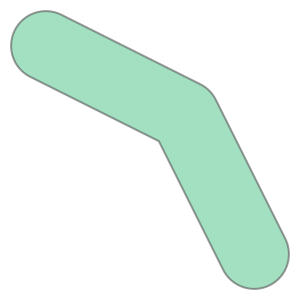

In [55]:
polygon_line.geometry[0]

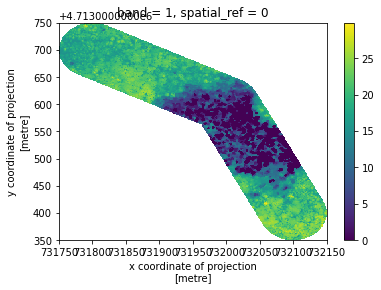

In [56]:
chm_HARV_crop_linebuffer = chm_HARV.rio.clip(polygon_line, polygon_line.crs)
chm_HARV_crop_linebuffer.plot()

#### Point buffer

In [63]:
# Make a points
import geopandas as gpd
from shapely.geometry import MultiPoint

xlist= [731800, 732000, 732100]
ylist = [4.7137e6, 4.7136e6, 4.7134e6]

points_geom = MultiPoint(list(zip(xlist, ylist)))
points = gpd.GeoDataFrame(index=[0], crs=chm_HARV.rio.crs, geometry=[points_geom])
polygon_points = points.buffer(50)    
print(polygon_points.geometry)

0    MULTIPOLYGON (((732150.000 4713400.000, 732149...
dtype: geometry


In [62]:
chm_HARV_crop_pointsbuffer = chm_HARV.rio.clip(polygon_points, polygon_points.crs)
chm_HARV_crop_pointsbuffer.plot()